In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import matplotlib.patheffects as PathEffects
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [61]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')


    # add the labels for each digit corresponding to the label
    txts = []
    for i in range(num_classes):
        # Position of each label at median of data points.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc

In [30]:
data = pd.read_csv("/Users/wangyangwu/Documents/Sentence_transformers/Results_Data/dimension_64/cl_art_ten_dim64_clus25.csv")

In [31]:
data = data.drop(['Unnamed: 0', 'article'],axis=1)

In [32]:
X = data.drop(["cluster"],axis=1)
y = data['cluster']

## TSNE

In [33]:
fashion_tsne = TSNE(random_state=RS).fit_transform(X)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x16b7e2370>)

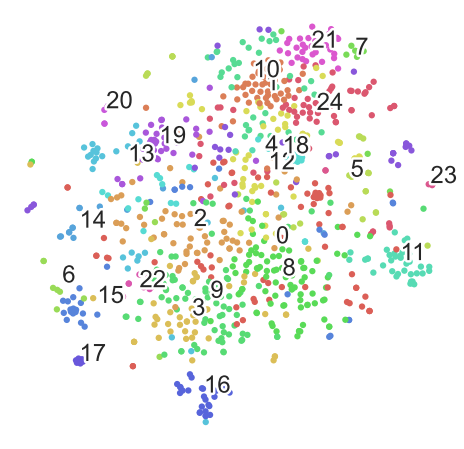

In [62]:
fashion_scatter(fashion_tsne, y)

## PCA

In [45]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)

In [46]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

In [47]:
print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.1795275  0.08110907 0.06600784 0.06043688]


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x16b59d6a0>)

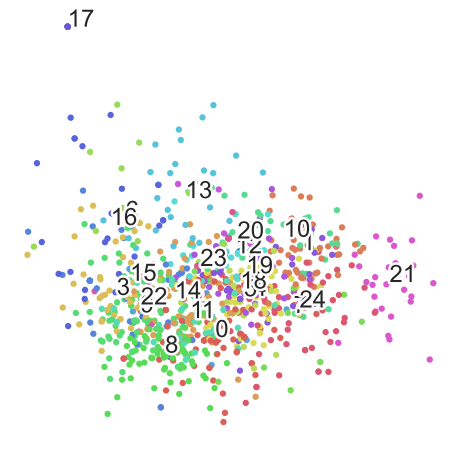

In [63]:
two_priciple = pca_df[['pca1','pca2']] # taking first and second principal component
fashion_scatter(two_priciple.values,y) # Visualizing the PCA output